In [ ]:
pip install tensorflow keras matplotlib

Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive


 Mount Google Drive and Set Paths

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define paths to the dataset
train_dir = '/content/drive/MyDrive/chest_xray/train'
val_dir = '/content/drive/MyDrive/chest_xray/val'
test_dir = '/content/drive/MyDrive/chest_xray/test'

# Verify that the paths exist
if not os.path.exists(train_dir):
    print("Train directory does not exist. Please check the path.")
if not os.path.exists(val_dir):
    print("Validation directory does not exist. Please check the path.")
if not os.path.exists(test_dir):
    print("Test directory does not exist. Please check the path.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Preprocessing and Augmentation

In [ ]:
# Image data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)


val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 4886 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 622 images belonging to 2 classes.


Build the CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Compile the Model

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Train the Model

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 124s 764ms/step - accuracy: 0.8068 - loss: 0.5831 - val_accuracy: 0.7500 - val_loss: 0.5454
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 95s 466ms/step - accuracy: 0.8805 - loss: 0.2710 - val_accuracy: 0.6875 - val_loss: 0.5997
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 81s 466ms/step - accuracy: 0.9040 - loss: 0.2334 - val_accuracy: 0.6875 - val_loss: 0.7092
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 82s 465ms/step - accuracy: 0.9114 - loss: 0.2098 - val_accuracy: 0.6250 - val_loss: 0.7314
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 82s 467ms/step - accuracy: 0.9232 - loss: 0.1890 - val_accuracy: 0.6875 - val_loss: 0.7216
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 74s 466ms/step - accuracy: 0.9386 - loss: 0.1643 - val_accuracy: 0.6250 - val_loss: 1.2435
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 82s 464ms/step - accuracy: 0.9356 - loss: 0.1608 - val_accuracy: 0.6875 - val_loss: 0.7021
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 74s 462ms/step - accuracy: 0.9487 - loss: 

Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 351s 18s/step - accuracy: 0.8252 - loss: 0.4402
Test Accuracy: 0.8295819759368896


Visualize Training Results

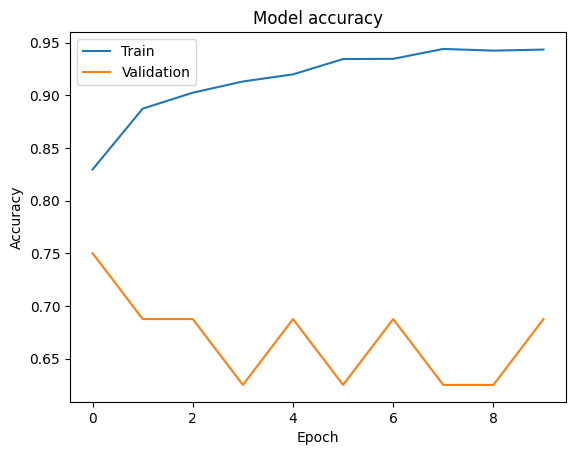

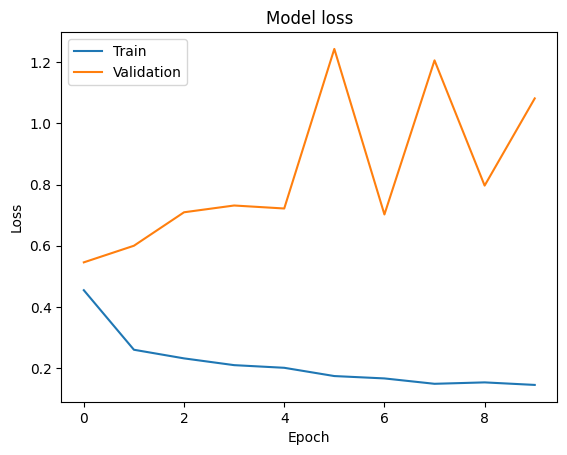

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Save the Model

In [ ]:
# Save the entire model as a SavedModel.
model.save('/content/drive/MyDrive/pneumonia_detection_model.keras')



Load the Model

In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/pneumonia_detection_model.keras')

# Evaluate the loaded model to verify it's correctly loaded
test_loss, test_acc = loaded_model.evaluate(test_generator)
print(f"Loaded Model Test Accuracy: {test_acc}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 287ms/step - accuracy: 0.8298 - loss: 0.4515
Loaded Model Test Accuracy: 0.8295819759368896


In [ ]:
print([layer.name for layer in model.layers])  # Verify layer names


['conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5', 'flatten_1', 'dense_2', 'dropout_1', 'dense_3']


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,102,533 (217.83 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,068,356 (145.22 MB)

In [ ]:
# Assuming your input image size is 150x150 with 3 channels (RGB)
dummy_input = np.zeros((1, 150, 150, 3))
_ = model.predict(dummy_input)
predictions = model.predict(dummy_input)
print(predictions)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.99008584]]


In [ ]:
from tensorflow.keras.preprocessing import image  # Add this import

# Load a single image (or a batch) to invoke the model
img_path = '/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0117-0001.jpeg'  # Replace with an actual image path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize if necessary

# Make a prediction to ensure the model is called
_ = model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Generate Heatmaps for Interpretability

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

def generate_heatmap(model, img_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Ensure the model is initialized by predicting on the input
    _ = model.predict(img_array)

    # Use the last convolutional layer
    last_conv_layer = model.layers[-3]  # Adjust this if necessary

    grad_model = tf.keras.models.Model(
        [model.inputs], [last_conv_layer.output, model.output]
    )

    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_class = tf.argmax(predictions[0])
        loss = predictions[:, pred_class]

    # Compute the gradient of the loss with respect to the output feature map
    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

    # Weight the convolutional outputs by the gradient
    conv_outputs = conv_outputs[0]
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Generate the heatmap
    heatmap = tf.reduce_mean(conv_outputs, axis=-1).numpy()
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (150, 150))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    # Display the image
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Provide the correct image path and generate the heatmap
img_path = '/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg'
#generate_heatmap(model, img_path)


Predict with the Model

In [ ]:
def predict_image(model, img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Pneumonia Detected")
    else:
        print("Normal Lungs")

predict_image(model, '/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0001-0001.jpeg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Normal Lungs


In [ ]:
def predict_image(model, img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Pneumonia Detected")
    else:
        print("Normal Lungs")

predict_image(model, '/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Pneumonia Detected


In [ ]:
def predict_image(model, img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Pneumonia Detected")
    else:
        print("Normal Lungs")

predict_image(model, '/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0089-0001.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Normal Lungs


In [ ]:
def predict_image(model, img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Pneumonia Detected")
    else:
        print("Normal Lungs")

predict_image(model, '/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person122_bacteria_585.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Pneumonia Detected


In [ ]:
def predict_image(model, img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Pneumonia Detected")
    else:
        print("Normal Lungs")

predict_image(model, '/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person91_bacteria_449.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Pneumonia Detected


In [ ]:
import pickle

# Example object to pickle (this could be any Python object)
example_object = {
    'name': 'Sample Object',
    'description': 'This is an example of saving an object as a pickle file.',
    'data': [1, 2, 3, 4, 5]
}

# Define the path to save the pickle file
pickle_file_path = 'pneumonia.pkl'

# Save the object as a pickle file
with open(pickle_file_path, 'wb') as pickle_file:
    pickle.dump(example_object, pickle_file)

print(f'Object saved as {pickle_file_path}')
